In [74]:
import json
import pandas as pd

# Load the datasets (with correct paths)
with open(r'D:\MS-ASL\MSASL_classes.json', 'r') as f:
    class_data = json.load(f)

with open(r'D:\MS-ASL\MSASL_synonym.json', 'r') as f:  # Corrected path to 'synonym'
    synonym_data = json.load(f)

with open(r'D:\MS-ASL\MSASL_train.json', 'r') as f:
    train_data = json.load(f)

with open(r'D:\MS-ASL\MSASL_test.json', 'r') as f:
    test_data = json.load(f)

with open(r'D:\MS-ASL\MSASL_val.json', 'r') as f:
    val_data = json.load(f)

# Convert the loaded data into DataFrames
class_df = pd.DataFrame(class_data)
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
val_df = pd.DataFrame(val_data)

# Process synonym data
if isinstance(synonym_data, list) and all(isinstance(i, list) for i in synonym_data):
    synonym_df = pd.DataFrame(synonym_data)
    # Flatten the list and count individual occurrences
    flattened_synonyms = [item for sublist in synonym_data for item in sublist]
    synonym_count = pd.Series(flattened_synonyms).value_counts()
else:
    synonym_df = pd.DataFrame()  # Initialize an empty DataFrame if the structure is unexpected
    print("The synonym data is not in the expected list of lists format. Here are the first few entries:")
    print(synonym_data[:5])  # Display the first few entries to check the structure

# Display the first few rows of each dataset
print("Class Dataset:")
print(class_df.head())

print("Synonym Dataset:")
print(synonym_df.head())
print("\nFlattened Synonym Count:")
print(synonym_count)

print("Train Dataset:")
print(train_df.head())

print("Test Dataset:")
print(test_df.head())

print("Validation Dataset:")
print(val_df.head())


Class Dataset:
         0
0    hello
1     nice
2  teacher
3      eat
4       no
Synonym Dataset:
        0       1      2     3     4
0  father     dad  daddy  None  None
1  mother     mom  mommy  None  None
2   shoes    shoe   None  None  None
3   pants    pant   None  None  None
4   color  colors   None  None  None

Flattened Synonym Count:
speed         2
room          2
box           2
center        2
waiter        2
             ..
crackers      1
die           1
death         1
dead          1
eyeglasses    1
Name: count, Length: 588, dtype: int64
Train Dataset:
                org_text     clean_text  start_time  signer_id  signer  start  \
0  match [light-a-MATCH]          match         0.0          0       0      0   
1                   FAIL           fail         0.0          0      -1      0   
2                  laugh          laugh         0.0          4      26      0   
3                   BOOK           book         0.0          0      -1      0   
4          sign-lan

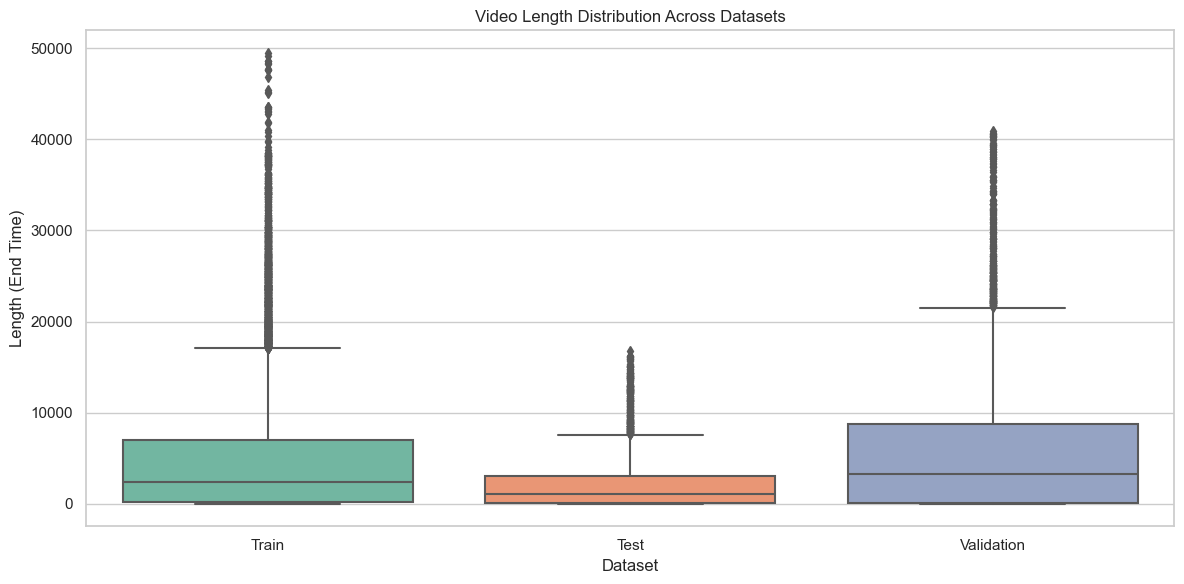

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style for seaborn
sns.set(style="whitegrid")

# Step 1: Extract lengths from end column and create a DataFrame
train_lengths = train_df['end']  # End times from the training dataset
test_lengths = test_df['end']    # End times from the test dataset
val_lengths = val_df['end']  # End times from the validation dataset

# Create a combined DataFrame
lengths_data = pd.DataFrame({
    'Length': pd.concat([train_lengths, test_lengths, val_lengths]),
    'Dataset': ['Train'] * len(train_lengths) + ['Test'] * len(test_lengths) + ['Validation'] * len(val_lengths)
})

# Step 2: Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset', y='Length', data=lengths_data, palette='Set2')
plt.title('Video Length Distribution Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Length (End Time)')
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


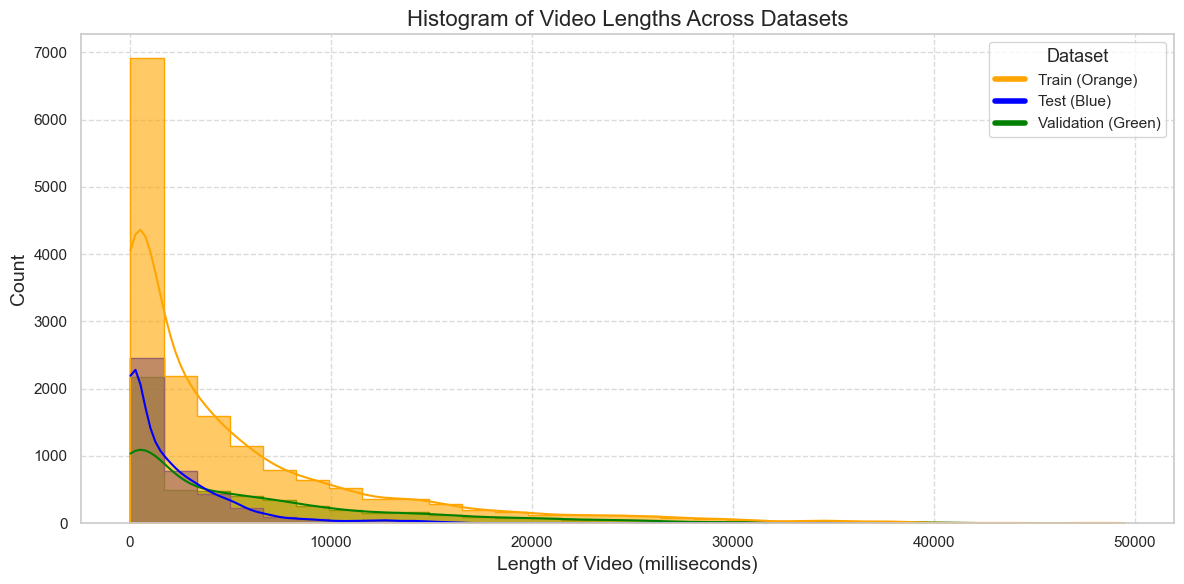

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style for seaborn
sns.set(style="whitegrid")

# Step 1: Extract lengths from the end column and create a DataFrame
train_lengths = train_df['end']  # End times from the training dataset
test_lengths = test_df['end']    # End times from the test dataset
val_lengths = val_df['end']  # End times from the validation dataset

# Create a combined DataFrame
lengths_data = pd.DataFrame({
    'Length': pd.concat([train_lengths, test_lengths, val_lengths]),
    'Dataset': ['Train'] * len(train_lengths) + ['Test'] * len(test_lengths) + ['Validation'] * len(val_lengths)
})

# Step 2: Plotting the histogram
plt.figure(figsize=(12, 6))

# Using the palette for consistent coloring
palette = {'Train': 'orange', 'Test': 'blue', 'Validation': 'green'}

sns.histplot(data=lengths_data, x='Length', hue='Dataset', bins=30, kde=True, element="step", 
             palette=palette, stat='count', alpha=0.6)

# Enhancing the plot with a detailed legend
plt.title('Histogram of Video Lengths Across Datasets', fontsize=16)
plt.xlabel('Length of Video (milliseconds)', fontsize=14)  # Updated label for x-axis
plt.ylabel('Count', fontsize=14)  # Y-axis still shows density

# Customizing the legend
legend_labels = ['Train (Orange)', 'Test (Blue)', 'Validation (Green)']
handles = [plt.Line2D([0], [0], color=palette[key], lw=4) for key in palette]
plt.legend(handles, legend_labels, title='Dataset', title_fontsize='13', fontsize='11', loc='upper right', frameon=True)

# Adding grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


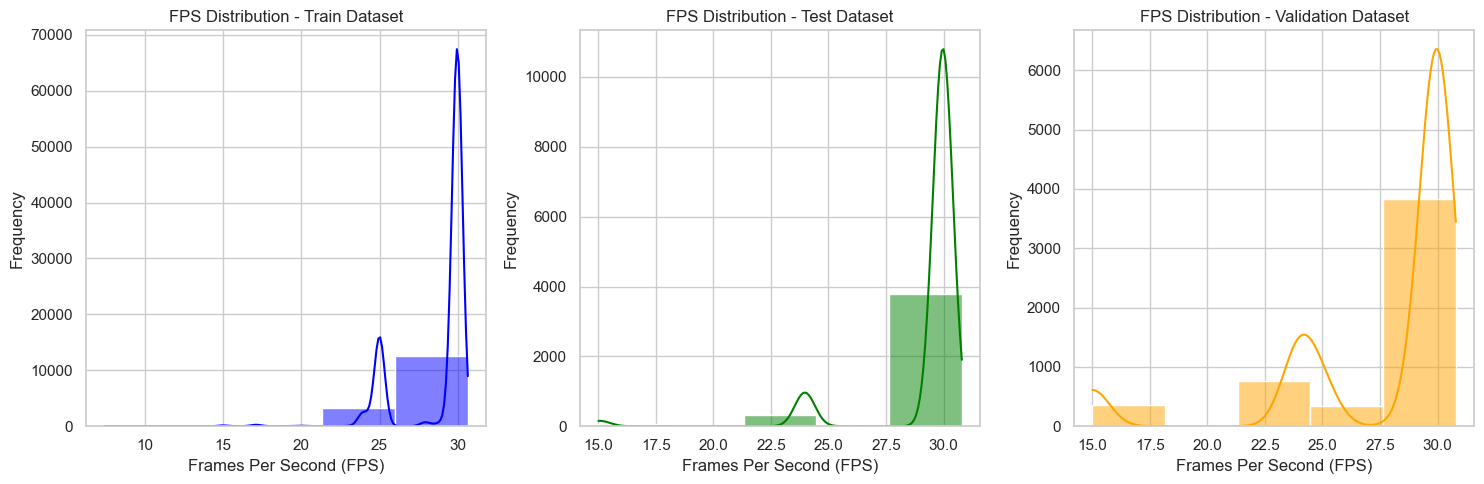

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Step 1: Create a figure with subplots for each dataset
plt.figure(figsize=(15, 5))

# Step 2: Create a histogram for the training dataset
plt.subplot(1, 3, 1)
sns.histplot(train_df['fps'], bins=5, kde=True, color='blue')
plt.title('FPS Distribution - Train Dataset')
plt.xlabel('Frames Per Second (FPS)')
plt.ylabel('Frequency')

# Step 3: Create a histogram for the test dataset
plt.subplot(1, 3, 2)
sns.histplot(test_df['fps'], bins=5, kde=True, color='green')
plt.title('FPS Distribution - Test Dataset')
plt.xlabel('Frames Per Second (FPS)')
plt.ylabel('Frequency')

# Step 4: Create a histogram for the validation dataset
plt.subplot(1, 3, 3)
sns.histplot(val_df['fps'], bins=5, kde=True, color='orange')
plt.title('FPS Distribution - Validation Dataset')
plt.xlabel('Frames Per Second (FPS)')
plt.ylabel('Frequency')

# Step 5: Adjust layout and display
plt.tight_layout()
plt.show()


In [78]:
# Shape of each dataset (rows, columns)
print(f'Class Dataset Shape: {class_df.shape}')
print(f'Synonym Dataset Shape: {synonym_df.shape}')
print(f'Train Dataset Shape: {train_df.shape}')
print(f'Test Dataset Shape: {test_df.shape}')
print(f'Validation Dataset Shape: {val_df.shape}')

# Summary statistics (numerical columns)
print(train_df.describe())


Class Dataset Shape: (1000, 1)
Synonym Dataset Shape: (272, 5)
Train Dataset Shape: (16054, 17)
Test Dataset Shape: (4172, 17)
Validation Dataset Shape: (5287, 17)
         start_time     signer_id        signer         start           end  \
count  16054.000000  16054.000000  16054.000000  16054.000000  16054.000000   
mean     178.803976     97.197957     15.017815   5037.761804   5130.968170   
std      251.900241    109.555791     21.987590   6976.158280   6978.451981   
min        0.000000      0.000000     -1.000000      0.000000     20.000000   
25%        4.338000     12.000000     -1.000000    130.000000    214.000000   
50%       80.991000     64.000000      6.000000   2354.500000   2447.500000   
75%      239.581000    124.000000     21.000000   6864.500000   6967.750000   
max     1644.910000    457.000000    121.000000  49298.000000  49477.000000   

              label        height           fps      end_time         width  \
count  16054.000000  16054.000000  16054.0000

In [79]:
# Check for missing values
print(class_df.isnull().sum())
print(synonym_df.isnull().sum())
print(train_df.isnull().sum())
print(test_df.isnull().sum())
print(val_df.isnull().sum())


0    0
dtype: int64
0      0
1      0
2    230
3    264
4    270
dtype: int64
org_text          0
clean_text        0
start_time        0
signer_id         0
signer            0
start             0
end               0
file              0
label             0
height            0
fps               0
end_time          0
url               0
text              0
box               0
width             0
review        10885
dtype: int64
org_text         0
clean_text       0
start_time       0
signer_id        0
signer           0
start            0
end              0
file             0
label            0
height           0
fps              0
end_time         0
url              0
text             0
box              0
width            0
review        3372
dtype: int64
org_text         0
clean_text       0
start_time       0
signer_id        0
signer           0
start            0
end              0
file             0
label            0
height           0
fps              0
end_time         0
url  

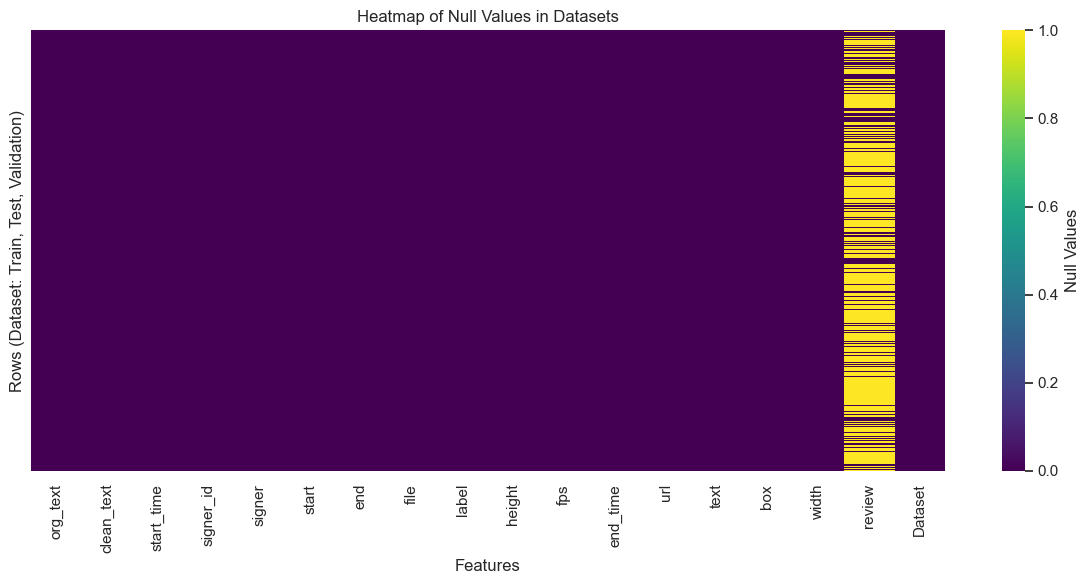

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the datasets into a single DataFrame for visualization
combined_df = pd.concat([train_df.assign(Dataset='Train'),
                          test_df.assign(Dataset='Test'),
                          val_df.assign(Dataset='Validation')])

# Step 1: Create a heatmap to visualize null values
plt.figure(figsize=(12, 6))
# Generate a boolean DataFrame indicating missing values
null_matrix = combined_df.isnull()

# Create the heatmap
sns.heatmap(null_matrix, cmap='viridis', cbar=True, yticklabels=False, cbar_kws={'label': 'Null Values'})
plt.title('Heatmap of Null Values in Datasets')
plt.xlabel('Features')
plt.ylabel('Rows (Dataset: Train, Test, Validation)')
plt.tight_layout()
plt.show()


In [81]:
print(class_df.isnull().sum())
print(synonym_df.isnull().sum())


0    0
dtype: int64
0      0
1      0
2    230
3    264
4    270
dtype: int64


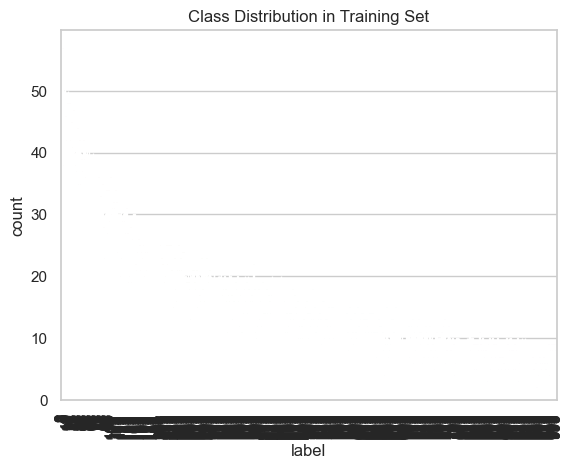

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution using the 'label' column
sns.countplot(data=train_df, x='label')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if there are many classes
plt.show()


In [83]:
# Inspect the structure of synonym_data
print(synonym_data[:5])  # Print the first few entries of the loaded JSON
# Rename columns for clarity
synonym_df.columns = ['primary', 'synonym1', 'synonym2', 'synonym3', 'synonym4']


[['father', 'dad', 'daddy'], ['mother', 'mom', 'mommy'], ['shoes', 'shoe'], ['pants', 'pant'], ['color', 'colors']]


In [84]:
# Check the structure of the synonym DataFrame
print("Synonym DataFrame:")
print(synonym_df.head())  # Display the first few rows
print("\nColumns in Synonym DataFrame:")
print(synonym_df.columns)  # Print the column names

# Now, check for unique synonyms if the expected column exists
if 'synonym' in synonym_df.columns:
    print("\nUnique Synonyms:")
    print(synonym_df['synonym'].unique())  # Now this will not raise a KeyError

    # Count how many signs have synonyms
    synonym_count = synonym_df['synonym'].value_counts()
    print("\nCount of Signs with Synonyms:")
    print(synonym_count)
else:
    print("The 'synonym' column does not exist in the synonym DataFrame.")


Synonym DataFrame:
  primary synonym1 synonym2 synonym3 synonym4
0  father      dad    daddy     None     None
1  mother      mom    mommy     None     None
2   shoes     shoe     None     None     None
3   pants     pant     None     None     None
4   color   colors     None     None     None

Columns in Synonym DataFrame:
Index(['primary', 'synonym1', 'synonym2', 'synonym3', 'synonym4'], dtype='object')
The 'synonym' column does not exist in the synonym DataFrame.


Average number of synonyms per sign: 1.19


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


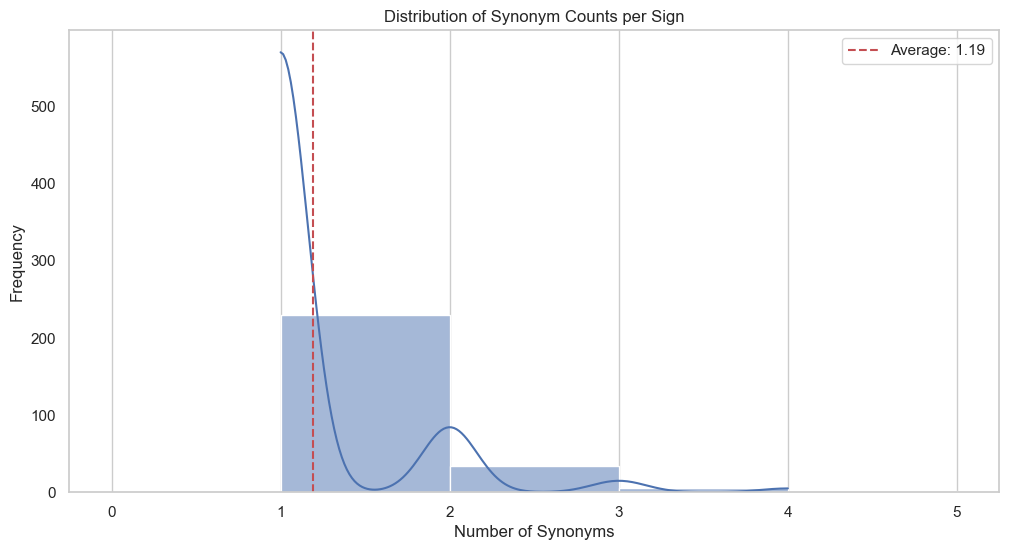

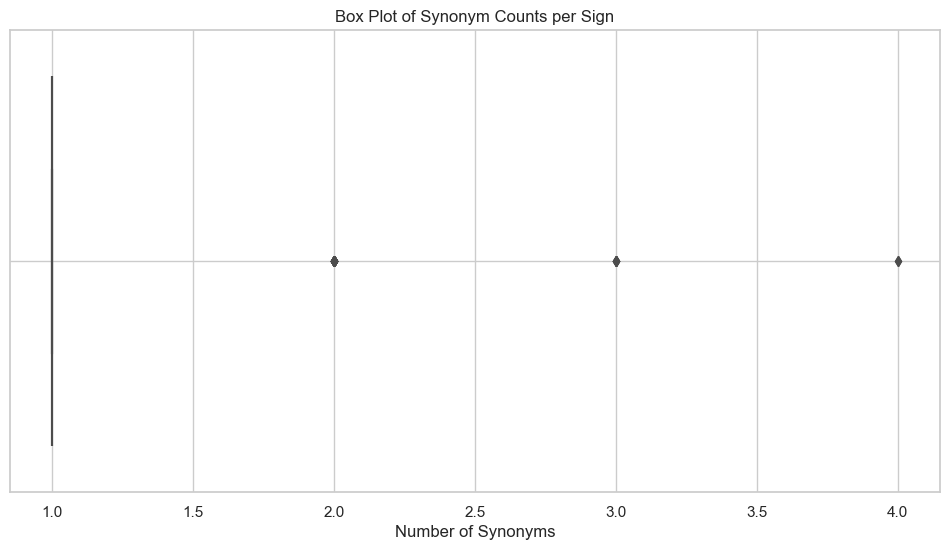

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming synonym_df is already defined and contains the synonyms as before
synonym_df.columns = ['primary', 'synonym1', 'synonym2', 'synonym3', 'synonym4']

# Flatten the DataFrame to count synonyms for each primary sign
synonym_counts = synonym_df.iloc[:, 1:].count(axis=1)  # Count non-NaN values across the rows

# Convert to DataFrame for analysis
synonym_count_df = pd.DataFrame({'primary': synonym_df['primary'], 'synonym_count': synonym_counts})

# Calculate average synonyms
average_synonyms = synonym_count_df['synonym_count'].mean()
print(f"Average number of synonyms per sign: {average_synonyms:.2f}")

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for the distribution of synonym counts
sns.histplot(synonym_count_df['synonym_count'], bins=range(0, 6), kde=True)
plt.title('Distribution of Synonym Counts per Sign')
plt.xlabel('Number of Synonyms')
plt.ylabel('Frequency')
plt.xticks(range(0, 6))
plt.grid(axis='y')
plt.axvline(average_synonyms, color='r', linestyle='--', label=f'Average: {average_synonyms:.2f}')
plt.legend()
plt.show()

# Box plot to show the average and distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='synonym_count', data=synonym_count_df)
plt.title('Box Plot of Synonym Counts per Sign')
plt.xlabel('Number of Synonyms')
plt.grid(axis='y')
plt.show()


In [86]:
# Check the column names in each DataFrame
print("Train DataFrame Columns:")
print(train_df.columns)

print("\nTest DataFrame Columns:")
print(test_df.columns)

print("\nValidation DataFrame Columns:")
print(val_df.columns)


Train DataFrame Columns:
Index(['org_text', 'clean_text', 'start_time', 'signer_id', 'signer', 'start',
       'end', 'file', 'label', 'height', 'fps', 'end_time', 'url', 'text',
       'box', 'width', 'review'],
      dtype='object')

Test DataFrame Columns:
Index(['org_text', 'clean_text', 'start_time', 'signer_id', 'signer', 'start',
       'end', 'file', 'label', 'height', 'fps', 'end_time', 'url', 'text',
       'box', 'width', 'review'],
      dtype='object')

Validation DataFrame Columns:
Index(['org_text', 'clean_text', 'start_time', 'signer_id', 'signer', 'start',
       'end', 'file', 'label', 'height', 'fps', 'end_time', 'url', 'text',
       'box', 'width', 'review'],
      dtype='object')


In [87]:
# Count of samples in train, test, and validation sets
print(f"Training Set Size: {train_df.shape[0]}")
print(f"Test Set Size: {test_df.shape[0]}")
print(f"Validation Set Size: {val_df.shape[0]}")

# Check the overlap of classes between train, test, and val
train_classes = set(train_df['label'])  # Use 'label' instead of 'class_name'
test_classes = set(test_df['label'])
val_classes = set(val_df['label'])

# Find common and unique classes
common_train_test = train_classes.intersection(test_classes)
common_train_val = train_classes.intersection(val_classes)

print(f"Common Classes in Train and Test: {len(common_train_test)}")
print(f"Common Classes in Train and Val: {len(common_train_val)}")


Training Set Size: 16054
Test Set Size: 4172
Validation Set Size: 5287
Common Classes in Train and Test: 1000
Common Classes in Train and Val: 1000


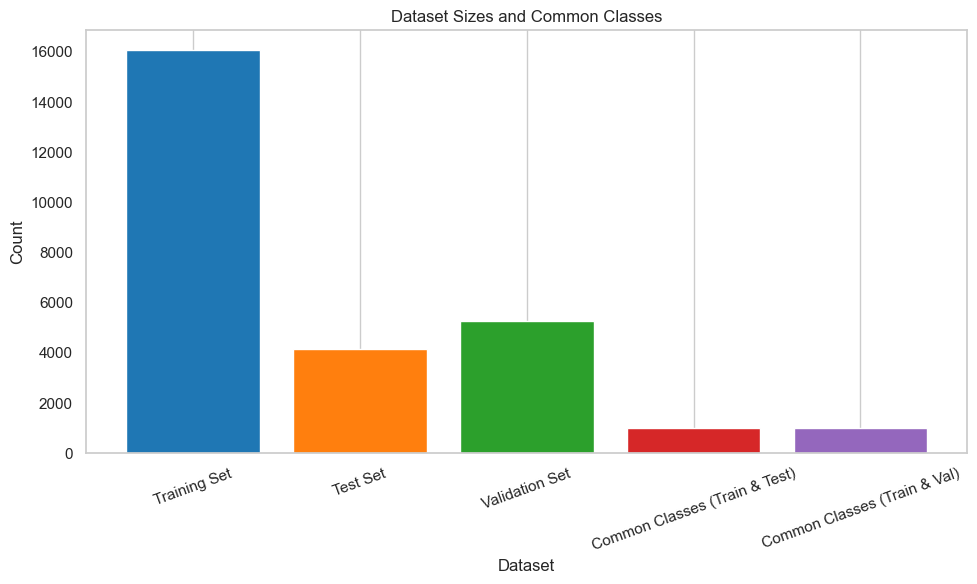

In [88]:
import matplotlib.pyplot as plt

# Data for the graph
dataset_sizes = {
    'Training Set': train_df.shape[0],
    'Test Set': test_df.shape[0],
    'Validation Set': val_df.shape[0],
    'Common Classes (Train & Test)': len(common_train_test),
    'Common Classes (Train & Val)': len(common_train_val)
}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(dataset_sizes.keys(), dataset_sizes.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Adding titles and labels
plt.title('Dataset Sizes and Common Classes')
plt.ylabel('Count')
plt.xlabel('Dataset')
plt.xticks(rotation=20)
plt.grid(axis='y')

# Show the graph
plt.tight_layout()
plt.show()


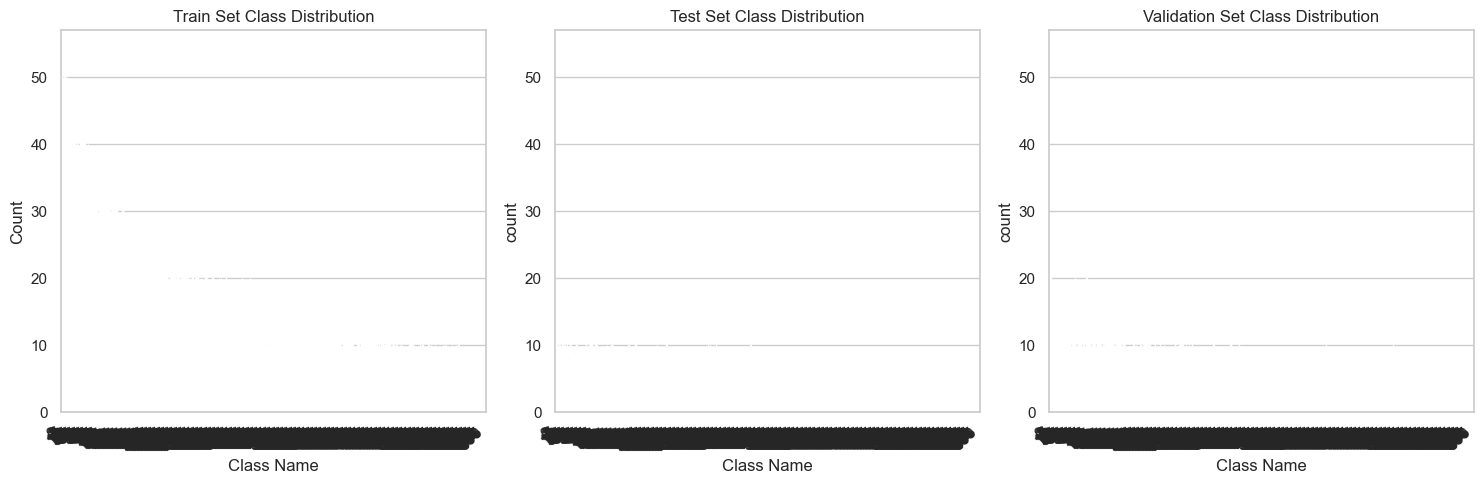

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Count plots for each dataset using 'label' instead of 'class_name'
sns.countplot(x='label', data=train_df, ax=ax[0], palette='viridis')
sns.countplot(x='label', data=test_df, ax=ax[1], palette='viridis')
sns.countplot(x='label', data=val_df, ax=ax[2], palette='viridis')

# Setting titles and labels
ax[0].set_title('Train Set Class Distribution')
ax[0].set_xlabel('Class Name')
ax[0].set_ylabel('Count')
ax[1].set_title('Test Set Class Distribution')
ax[1].set_xlabel('Class Name')
ax[2].set_title('Validation Set Class Distribution')
ax[2].set_xlabel('Class Name')

# Rotate x-tick labels for better readability
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')

# Optionally set a common y-axis limit
max_count = max(train_df['label'].value_counts().max(),
                 test_df['label'].value_counts().max(),
                 val_df['label'].value_counts().max())
for a in ax:
    a.set_ylim(0, max_count)

# Adjust layout
plt.tight_layout()
plt.show()
